In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1

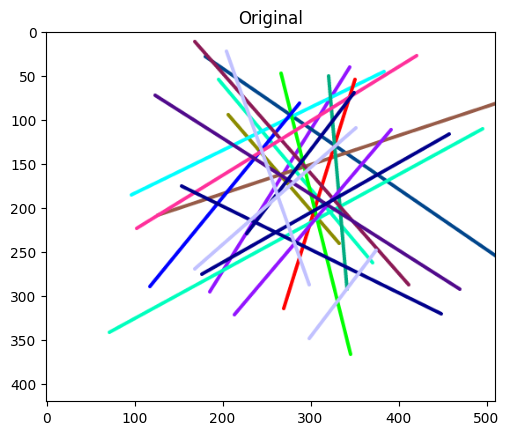

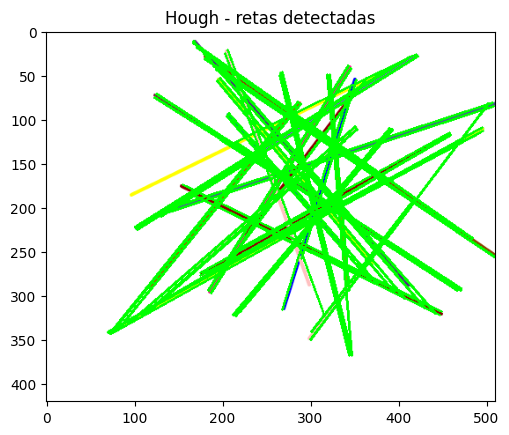

Número de palitos:  29.0


In [62]:
img = cv2.imread('jogo-dos-palitos.png')
copy_img = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 100, 200, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1.5, np.pi/180, 100, maxLineGap=80, minLineLength=100)
for line in lines:
 x1, y1, x2, y2 = line[0]
 cv2.line(img, (x1,y1), (x2,y2), (0,255,0), 2)
plt.title("Original")
plt.imshow(copy_img)
plt.show()

plt.title("Hough - retas detectadas")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

print('Número de palitos: ', len(lines)/2)


# 2

Num hemacias: 194


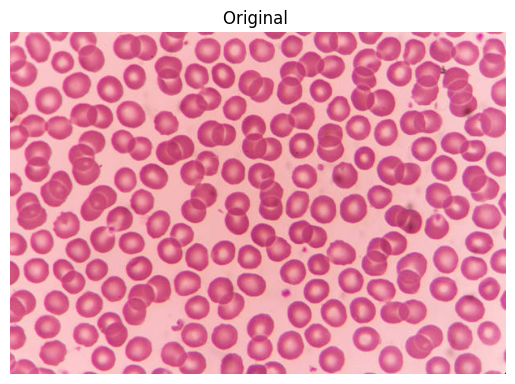

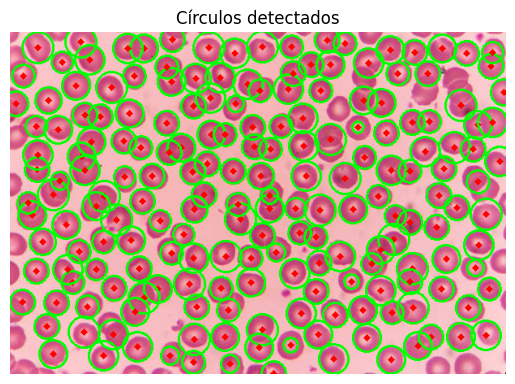

In [27]:
image = cv2.imread('Hemacias.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=15,
                           param1=20, param2=30, minRadius=5, maxRadius=20)
circle_image = image.copy()
if circles is not None:
  circles = np.uint16(np.around(circles))

  for i in circles[0, :]:
    cv2.circle(circle_image, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv2.circle(circle_image, (i[0], i[1]), 2, (0, 0, 255), 3)

num_circles = len(circles[0]) if circles is not None else 0

print(f'Num hemacias: {num_circles}')
circle_image_rgb = cv2.cvtColor(circle_image, cv2.COLOR_BGR2RGB)
plt.title('Original ')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.title('Círculos detectados')
plt.imshow(circle_image_rgb)
plt.axis('off')
plt.show()


# 3

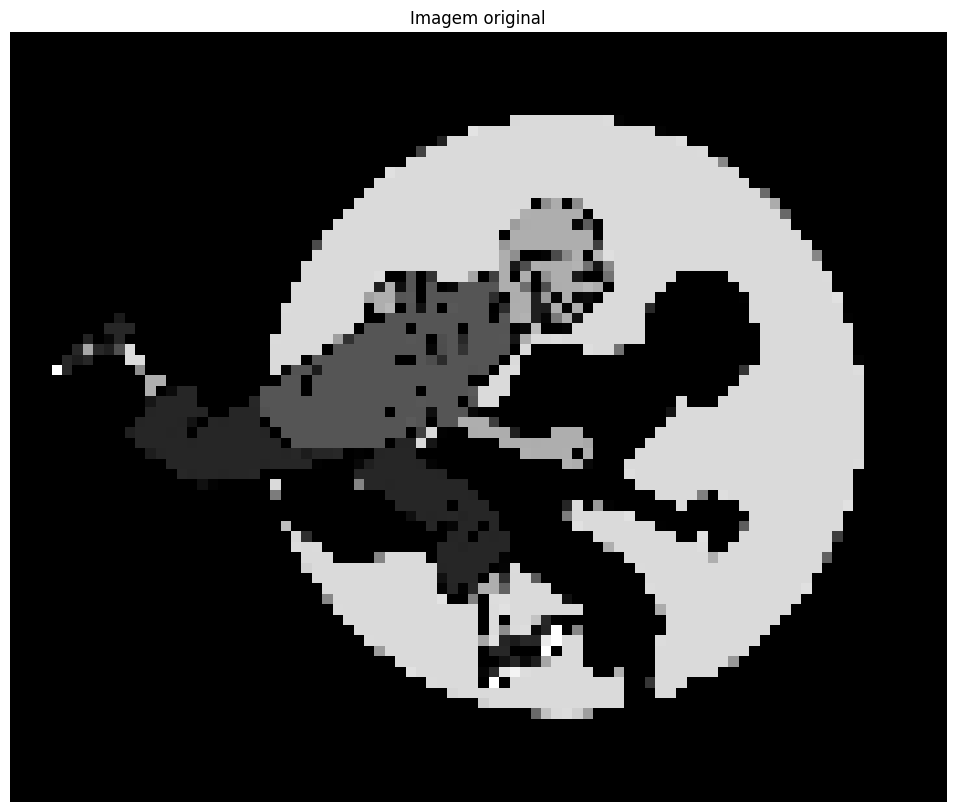

In [57]:
img_bald = cv2.imread('baldtin1000pb.png')
img_bald = cv2.resize(img_bald, (0,0), fx=0.09, fy=0.09)
plt.figure(figsize=(15,10))
plt.imshow(img_bald)
plt.title('Imagem original')
plt.axis('off')
plt.show()

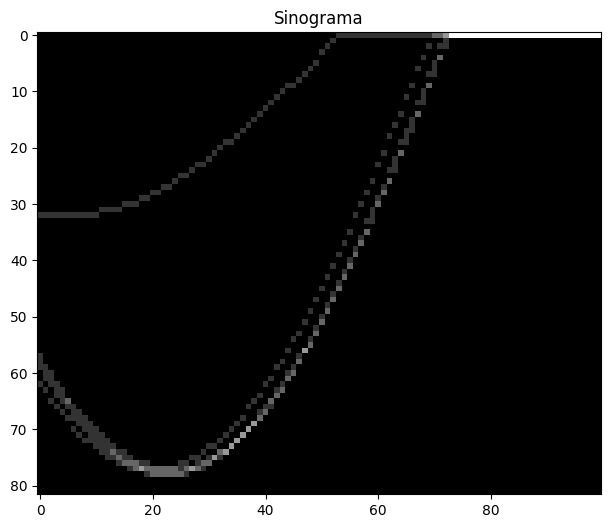

In [61]:
def hough_transformation(img, theta_resol=100, rho_resol=82, threshold=60):

  gray_bald = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  theta_d = np.linspace(0, np.pi, theta_resol)
  h, w = gray_bald.shape

  rho_d = np.arange(0, rho_resol)
  accum = np.zeros((len(rho_d), len(theta_d)))

  for i_h in range(h):
    for j_h in range(w):
      grey_pos = gray_bald[i_h, j_h]
      if grey_pos == 255:
        for t in range(len(theta_d)):
          rho = i_h * np.cos(theta_d[t]) + j_h * np.sin(theta_d[t])
          r_idx = np.abs(rho_d - rho).argmin()
          accum[r_idx, t] += 1

  loc_max = np.where(accum >= threshold)
  rho_max = rho_d[loc_max[0]]
  theta_max = theta_d[loc_max[1]]
  return accum, rho_max, theta_max

def show_hough_transform(accumulator):
  plt.figure(figsize=(10, 6))
  plt.imshow(accumulator, cmap='gray')
  plt.title('Sinograma')
  plt.show()



transform = hough_transformation(img_bald)
show_hough_transform(transform[0])


# 4

A transformada de Hough para uma reeta no plano $(x,y)$ pode seer expressa por meio de coordenadas polares:

$\rho = x \cos (\theta) + y \sin(\theta)$

onde $\rho$ é a distância da reta a $(0,0)$ e $\theta$ é o ângulo com o eixo $x$.

Para cada pixel $x,y$, o sinograma [https://en.wikipedia.org/wiki/Radon_transform] $S(\theta, \rho)$ é construido integrando a intensidade da imagem ao longo das retas definidas por $\theta$ e $\rho$

Logo, por definição, o sinograma pode seer calculado como: $$ S(\theta, \rho) = \int_{\infty}^{\infty} I(x,y) δ(p-x\cos \theta - y \sin \theta)dxdy$$

onde $\delta$ é a função delta de Diract